이 노트북은 [케라스 창시자에게 배우는 딥러닝 2판](https://tensorflow.blog/kerasdl2/)의 예제 코드를 담고 있습니다.

<table align="left">
    <tr>
        <td>
            <a href="https://colab.research.google.com/github/rickiepark/deep-learning-with-python-2nd/blob/main/chapter08_intro-to-dl-for-computer-vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
        </td>
    </tr>
</table>

# 컴퓨터 비전을 위한 딥러닝

## 합성곱 신경망 소개

In [ ]:
# !pip install tensorflow==2.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.6/489.6 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.1/463.1 KB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.6 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.2
    Uninstalling tensorflow-2.9.2:
      Successfully uninstalled tensorflow-2.9.2


In [ ]:
ls -la

total 16
drwxr-xr-x 1 root root 4096 Jan 27 14:36 ./
drwxr-xr-x 1 root root 4096 Jan 31 00:43 ../
drwxr-xr-x 4 root root 4096 Jan 27 14:36 .config/
drwxr-xr-x 1 root root 4096 Jan 27 14:36 sample_data/


In [ ]:
# !rm -R cats_vs_dogs_small kagglecatsanddogs_5340.zip PetImages

**간단한 컨브넷 만들기**

In [1]:
from tensorflow import keras
from keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

**모델의 `summary()` 메서드 출력**

첫 conv 1개 필터의 shape
- w.shape = (3, 3, 1), b = (1, ) => 1개 필터에 사용되는 파라미터의 수 = 3\*3\*1 + 1 = 10
- 32개 필터의 파라미터의 수 = 32 * 10 = 320

둘째 conv 1개 필터의 shape
- w.shape = (3, 3, 32), b = (1, ) => 1개 필터에 사용되는 파라미터의 수 = 3\*3\*32 + 1 = 289
- 64개 필터의 파라미터의 수 = 64 * 289 = 18496

**MNIST 이미지에서 컨브넷 훈련하기**

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 15s 5ms/step - loss: 0.1630 - accuracy: 0.9496
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0449 - accuracy: 0.9860
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0310 - accuracy: 0.9902
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0235 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0177 - accuracy: 0.9947


**컨브넷 평가하기**

In [3]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도: {test_acc:.3f}")

313/313 [==============================] - 2s 4ms/step - loss: 0.0275 - accuracy: 0.9920
테스트 정확도: 0.992


### 합성곱 연산

#### 경계 문제와 패딩 이해하기

#### 합성곱 스트라이드 이해하기

### 최대 풀링 연산

**최대 풀링 층이 빠진 잘못된 구조의 컨브넷**

In [4]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [5]:
model_no_max_pool.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 61952)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712,202
Trainable params: 712,202
Non-trainab

In [6]:
model_no_max_pool.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model_no_max_pool.fit(train_images, train_labels, epochs=5, batch_size=64)

test_loss_nm, test_acc_nm = model_no_max_pool.evaluate(test_images, test_labels)
print(f"테스트 정확도: {test_acc_nm:.3f}")

Epoch 1/5
938/938 [==============================] - 10s 8ms/step - loss: 0.1225 - accuracy: 0.9627
Epoch 2/5
938/938 [==============================] - 8s 8ms/step - loss: 0.0425 - accuracy: 0.9874
Epoch 3/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0300 - accuracy: 0.9910
Epoch 4/5
938/938 [==============================] - 8s 8ms/step - loss: 0.0215 - accuracy: 0.9932
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0326 - accuracy: 0.9903
테스트 정확도: 0.990


In [7]:
import gc
del model, model_no_max_pool
gc.collect()

2303

## 소규모 데이터셋에서 밑바닥부터 컨브넷 훈련하기
1. 밑바닥부터 모델 생성
2. 1 + 데이터 증식 사용하기
3. 사전 훈련모델을 전처리기로 사용하기
4. 사전 훈련모델 + 데이터 증식으로 전달학습(transfer learning)
5. 사전 훈련모델 + 데이터 증식으로 미세조정(fine tuning)

### 작은 데이터셋 문제에서 딥러닝의 타당성

### 데이터 내려받기

캐글에서 dogs-vs-cats 데이터셋을 다운로드하려면 캐글에 가입해야 한 후 생성한 API 키를 사용해야 합니다. 이런 과정이 번거롭다면 다음 명령으로 구글 드라이브에서 직접 다운로드할 수 있습니다.

```python
import gdown
gdown.download(id='18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd', output='dogs-vs-cats.zip')
```

그다음 아래 3개의 코드 셀을 건너 뛰고 바로 `unzip` 명령을 실행하세요.

In [8]:
import gdown
gdown.download(id='18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd', output='dogs-vs-cats.zip')

Downloading...
From: https://drive.google.com/uc?id=18uC7WTuEXKJDDxbj-Jq6EjzpFrgE7IAd
To: /content/dogs-vs-cats.zip
100%|██████████| 852M/852M [00:12<00:00, 69.3MB/s]


'dogs-vs-cats.zip'

#### MS 다운로드 시
만약 위 코드로 다운로드가 이뤄지지 않는 경우:
- https://www.microsoft.com/en-us/download/details.aspx?id=54765

In [ ]:
# !wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2023-02-02 00:09:32--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.36.48.252, 2600:1413:b000:793::317f, 2600:1413:b000:78a::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.36.48.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   277MB/s    in 2.8s    

2023-02-02 00:09:35 (277 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [ ]:
# # kaggle.json 파일을 업로드하세요.
# from google.colab import files
# files.upload()

In [ ]:
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# !kaggle competitions download -c dogs-vs-cats

이하는 MS에서 다운로드할 때 실행할 명령어

In [ ]:
!ls -la *.zip

-rw-r--r-- 1 root root 824887076 May  9  2022 kagglecatsanddogs_5340.zip


In [ ]:
!unzip -qq kagglecatsanddogs_5340.zip

In [ ]:
!ls

 CDLA-Permissive-2.0.pdf      PetImages        sample_data
 kagglecatsanddogs_5340.zip  'readme[1].txt'


In [ ]:
!ls PetImages/

Cat  Dog


size가 0인 이미지가 있어 에러가 발생한다. 이 파일을 다른 파일로 대체하자.

In [ ]:
import os

maindir = 'PetImages'
files = {'Cat':[], 'Dog':[]}
for cat in files.keys():
    path = os.path.join(maindir, cat)
    flist = os.listdir(path)
    for f in flist:
        if os.stat(os.path.join(path, f)).st_size == 0:
            print(f'{f} size = 0 in {cat}')

666.jpg size = 0 in Cat
11702.jpg size = 0 in Dog


In [ ]:
!cp PetImages/Cat/10000.jpg PetImages/Cat/666.jpg
!cp PetImages/Dog/10000.jpg PetImages/Dog/11702.jpg

In [ ]:
os.stat(os.path.join(maindir, 'Cat', '666.jpg')).st_size

130307

In [ ]:
!unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip

**이미지를 훈련, 검증, 테스트 디렉토리로 복사하기**

In [ ]:
'cat'.title()

'Cat'

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("PetImages")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        Category = category.title()
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        onames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname, oname in zip(fnames, onames):
            shutil.copyfile(src=original_dir / Category / oname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
# make_subset("test", start_index=1500, end_index=2500)
make_subset("test", start_index=2500, end_index=3500)

#### 구글 다운로드 시
구글에서 다운로드 했다면, 아래 코드를 실행한다.

In [9]:
!unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip

In [10]:
%ls train

cat.0.jpg      cat.3250.jpg  cat.7751.jpg   dog.12250.jpg  dog.5500.jpg
cat.10000.jpg  cat.3251.jpg  cat.7752.jpg   dog.12251.jpg  dog.5501.jpg
cat.10001.jpg  cat.3252.jpg  cat.7753.jpg   dog.12252.jpg  dog.5502.jpg
cat.10002.jpg  cat.3253.jpg  cat.7754.jpg   dog.12253.jpg  dog.5503.jpg
cat.10003.jpg  cat.3254.jpg  cat.7755.jpg   dog.12254.jpg  dog.5504.jpg
cat.10004.jpg  cat.3255.jpg  cat.7756.jpg   dog.12255.jpg  dog.5505.jpg
cat.10005.jpg  cat.3256.jpg  cat.7757.jpg   dog.12256.jpg  dog.5506.jpg
cat.10006.jpg  cat.3257.jpg  cat.7758.jpg   dog.12257.jpg  dog.5507.jpg
cat.10007.jpg  cat.3258.jpg  cat.7759.jpg   dog.12258.jpg  dog.5508.jpg
cat.10008.jpg  cat.3259.jpg  cat.775.jpg    dog.12259.jpg  dog.5509.jpg
cat.10009.jpg  cat.325.jpg   cat.7760.jpg   dog.1225.jpg   dog.550.jpg
cat.1000.jpg   cat.3260.jpg  cat.7761.jpg   dog.12260.jpg  dog.5510.jpg
cat.10010.jpg  cat.3261.jpg  cat.7762.jpg   dog.12261.jpg  dog.5511.jpg
cat.10011.jpg  cat.3262.jpg  cat.7763.jpg   dog.12262.jpg  dog.55

In [11]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

### 모델 만들기

**강아지 vs. 고양이 분류를 위한 소규모 컨브넷 만들기**

In [12]:
from tensorflow import keras
from keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [13]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

**모델 훈련 설정하기**

In [14]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### 데이터 전처리

**`image_dataset_from_directory`를 사용하여 이미지 읽기**

In [19]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [20]:
type(train_dataset)

tensorflow.python.data.ops.batch_op._BatchDataset

tensorflow Dataset의 활용법
- batch_size 지정하고
- resize도 하고 ....
- shuffle로 섞을 수도 있고
- 서브 폴더명으로 라벨도 생성하고

참고: https://www.tensorflow.org/guide/data

In [21]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [22]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [23]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [24]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [ ]:
li = [3, 5, 7]
o = []
for e in li:
    o.append(e*5)
o

[15, 25, 35]

In [ ]:
list(map(lambda x: x*5, li))

[15, 25, 35]

**`Dataset`이 반환하는 데이터와 레이블 크기 확인하기**

In [25]:
for data_batch, labels_batch in train_dataset:
    print("데이터 배치 크기:", data_batch.shape)
    print("레이블 배치 크기:", labels_batch.shape)
    break

데이터 배치 크기: (32, 180, 180, 3)
레이블 배치 크기: (32,)


In [26]:
labels_batch[:5]

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 1, 1, 0, 0], dtype=int32)>

In [27]:
np.unique(labels_batch.numpy(), return_counts=True)

(array([0, 1], dtype=int32), array([17, 15]))

In [29]:
import matplotlib.pyplot as plt
image = data_batch[0].numpy().astype('uint8')

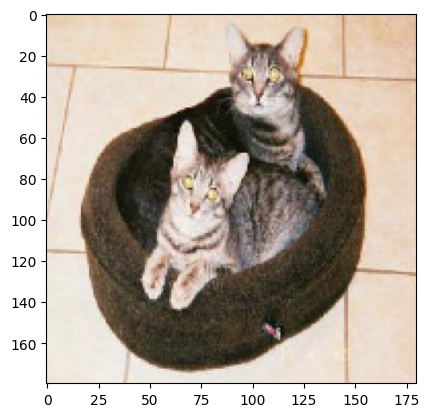

In [30]:
plt.imshow(image)

**`Dataset`을 사용해 모델 훈련하기**

In [31]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 10s 105ms/step - loss: 0.7031 - accuracy: 0.5145 - val_loss: 0.6921 - val_accuracy: 0.5280
Epoch 2/30
63/63 [==============================] - 5s 71ms/step - loss: 0.6923 - accuracy: 0.5175 - val_loss: 0.6899 - val_accuracy: 0.5210
Epoch 3/30
63/63 [==============================] - 6s 90ms/step - loss: 0.6887 - accuracy: 0.5365 - val_loss: 0.6722 - val_accuracy: 0.6580
Epoch 4/30
63/63 [==============================] - 5s 70ms/step - loss: 0.6675 - accuracy: 0.5955 - val_loss: 0.6561 - val_accuracy: 0.6080
Epoch 5/30
63/63 [==============================] - 6s 85ms/step - loss: 0.6324 - accuracy: 0.6515 - val_loss: 0.6647 - val_accuracy: 0.6170
Epoch 6/30
63/63 [==============================] - 5s 70ms/step - loss: 0.6089 - accuracy: 0.6705 - val_loss: 0.6096 - val_accuracy: 0.6650
Epoch 7/30
63/63 [==============================] - 9s 131ms/step - loss: 0.5594 - accuracy: 0.6990 - val_loss: 0.6239 - val_accuracy: 0.6760
Epoch 8/30

**훈련 정확도와 손실 그래프 그리기**

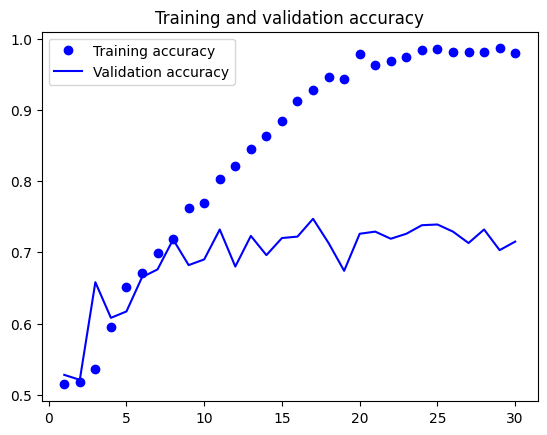

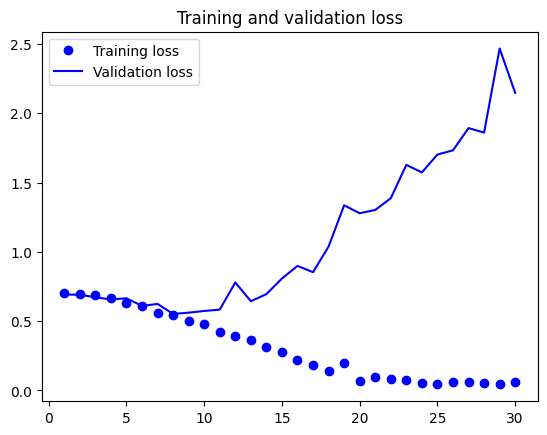

In [32]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**테스트 세트에서 모델 평가하기**

In [33]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 4s 55ms/step - loss: 0.5609 - accuracy: 0.7150
테스트 정확도: 0.715


### 데이터 증식 사용하기
- https://machinelearningmastery.com/image-augmentation-deep-learning-keras/
- https://www.kaggle.com/code/parulpandey/overview-of-popular-image-augmentation-packages
- https://towardsdatascience.com/top-python-libraries-for-image-augmentation-in-computer-vision-2566bed0533e

**컨브넷에 추가할 데이터 증식 단계 정의하기**

In [34]:
0.1 * 180 / np.pi

5.729577951308232

In [35]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),  # [-36, +36]
        layers.RandomZoom(0.2),      # [180-2*18, 180+2*18]
    ]
)

**랜덤하게 증식된 훈련 이미지 출력하기**

In [37]:
plt.figure(figsize=(15, 15))
for images, labels in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

Output hidden; open in https://colab.research.google.com to view.

**이미지 증식과 드롭아웃을 포함한 컨브넷 만들기**

In [38]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**규제를 추가한 컨브넷 훈련하기**

In [39]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 8s 75ms/step - loss: 0.7120 - accuracy: 0.5040 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 6s 88ms/step - loss: 0.6955 - accuracy: 0.5010 - val_loss: 0.6929 - val_accuracy: 0.5260
Epoch 3/100
63/63 [==============================] - 5s 71ms/step - loss: 0.6945 - accuracy: 0.5085 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 4/100
63/63 [==============================] - 6s 90ms/step - loss: 0.6896 - accuracy: 0.5430 - val_loss: 0.7361 - val_accuracy: 0.5020
Epoch 5/100
63/63 [==============================] - 6s 93ms/step - loss: 0.6895 - accuracy: 0.5860 - val_loss: 0.6547 - val_accuracy: 0.6000
Epoch 6/100
63/63 [==============================] - 6s 90ms/step - loss: 0.6659 - accuracy: 0.6105 - val_loss: 0.6785 - val_accuracy: 0.5670
Epoch 7/100
63/63 [==============================] - 6s 91ms/step - loss: 0.6468 - accuracy: 0.6295 - val_loss: 0.7038 - val_accuracy: 0.6040
Epoch 

**테스트 세트에서 모델 ~훈련~ 평가하기**

In [45]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 4s 46ms/step - loss: 0.4319 - accuracy: 0.8130
테스트 정확도: 0.813


<Axes: >

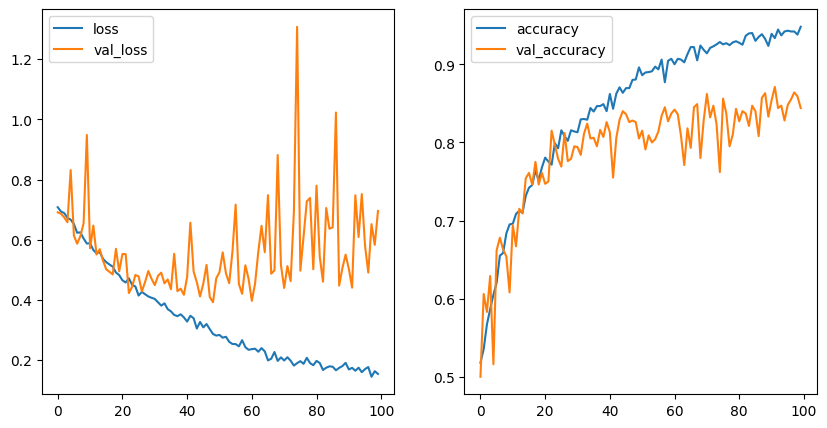

In [ ]:
import pandas  as pd
import matplotlib.pyplot as plt
tmp = pd.DataFrame(history.history)
fig, axes = plt.subplots(1,2, figsize=(10,5))
tmp[['loss', 'val_loss']].plot(ax=axes[0])
tmp[['accuracy', 'val_accuracy']].plot(ax=axes[1])

## 사전 훈련된 모델 활용하기

### 사전 훈련된 모델을 사용한 특성 추출

**VGG16 합성곱 기반 층 만들기**

In [40]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [41]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

#### 데이터 증식을 사용하지 않는 빠른 특성 추출

**VGG16 특성과 해당 레이블 추출하기**

keras.applications.vgg16.preprocess_input(images) :
- RGB를 BGR 포맷으로 변환하고 : images = images[..., ::-1]
- 이미지넷 전체 데이터에 대해 채널별로 평균이 0 되도록 변환
 - 1백만개의 학습이미지의 채널별 평균 cmean = imageNettrain.mean(axis=(0,1,2))
 - images = images - cmean

In [ ]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        # (32,180,180,3) => rgb - bgr, 각 픽셀값이 0 ~ 255 => -127 ~ 127
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        # (32,180,180,3) => (32,5,5,512)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    # (2000,5,5,512), (2000, 1)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

In [43]:
train_features.shape

(2000, 5, 5, 512)

**밀집 연결 분류기 정의하고 훈련하기**

In [44]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 2s 14ms/step - loss: 14.3713 - accuracy: 0.9270 - val_loss: 3.6428 - val_accuracy: 0.9670
Epoch 2/20
63/63 [==============================] - 1s 9ms/step - loss: 4.4648 - accuracy: 0.9730 - val_loss: 3.0932 - val_accuracy: 0.9780
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 1.3603 - accuracy: 0.9865 - val_loss: 6.7372 - val_accuracy: 0.9660
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 1.1353 - accuracy: 0.9915 - val_loss: 3.8006 - val_accuracy: 0.9740
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 0.7867 - accuracy: 0.9920 - val_loss: 4.4873 - val_accuracy: 0.9740
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 0.6939 - accuracy: 0.9930 - val_loss: 4.5832 - val_accuracy: 0.9780
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 1.1710 - accuracy: 0.9925 - val_loss: 6.1754 - val_accuracy: 0.9740
Epoch 8/20
63/63 [

**결과를 그래프로 나타내기**

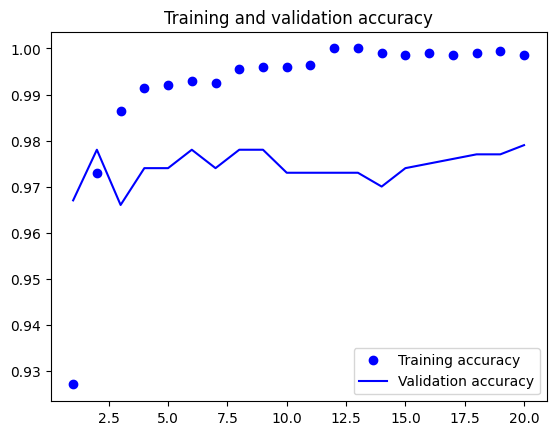

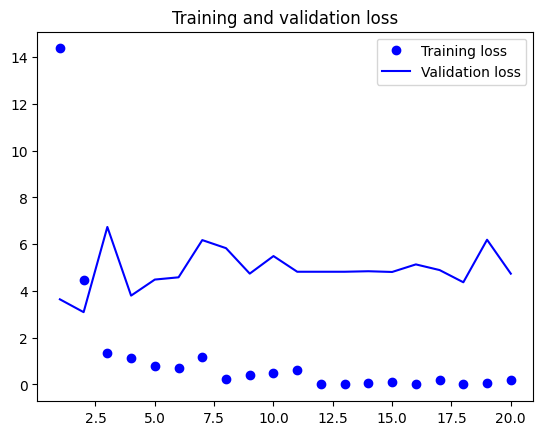

In [46]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [47]:
test_model = keras.models.load_model(
    "feature_extraction.keras")
test_loss, test_acc = test_model.evaluate(test_features,test_labels)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 0s 3ms/step - loss: 4.4092 - accuracy: 0.9695
테스트 정확도: 0.970


In [48]:
import gc
del train_features, train_labels, val_features, val_labels, test_features, test_labels
gc.collect()

11285

#### 데이터 증식을 사용한 특성 추출
![](https://drek4537l1klr.cloudfront.net/chollet2/Figures/08-12.png)

**VGG16 합성곱 기반 층을 만들고 동결하기**

In [49]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
# base 모델의 weight를 상수로 고정시킴
conv_base.trainable = False
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**동결하기 전과 후에 훈련 가능한 가중치 리스트를 출력하기**

- 5개 conv block에 13개의 conv layer가 존재
- 각 conv layer에는 w, b 3개의 python object가 존재
- 전체 학습 가능한 python object의 수는 26개

In [ ]:
conv_base.trainable = True
print("합성곱 기반 층을 동결하기 전의 훈련 가능한 가중치 개수:",
      len(conv_base.trainable_weights))

합성곱 기반 층을 동결하기 전의 훈련 가능한 가중치 개수: 26


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

- 대규모의 모델은 이미 적절히 최적화된 학습 파라미터를 가지고 있다고 보고
- 이 파라미터를 재활용하겠다는 의미로 trainable = False 지정한다.
- 이때 base은 back propagation이 되지 않아, 전체적인 학습 속도가 빨라진다.

In [51]:
conv_base.trainable = False
print("합성곱 기반 층을 동결한 후의 훈련 가능한 가중치 개수:",
      len(conv_base.trainable_weights))

합성곱 기반 층을 동결한 후의 훈련 가능한 가중치 개수: 0


**데이터 증식 단계와 밀집 분류기를 합성곱 기반 층에 추가하기**

In [52]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

# 적절한 시간과 적절한 컴퓨터에서 학습이 완료되도록 작은 사이즈를 입력
# - 실제 프로젝트에서는 더 고해상도의 이미지를 입력으로 사용하는 것이 좋다.
# - 리소스가 제한된 모바일 환경에서 구동하기 위해서는 input size를 튜닝해야 함.
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 12s 143ms/step - loss: 16.9594 - accuracy: 0.8955 - val_loss: 4.2610 - val_accuracy: 0.9700
Epoch 2/50
63/63 [==============================] - 9s 138ms/step - loss: 5.5980 - accuracy: 0.9530 - val_loss: 5.6923 - val_accuracy: 0.9680
Epoch 3/50
63/63 [==============================] - 9s 142ms/step - loss: 5.8198 - accuracy: 0.9565 - val_loss: 4.7971 - val_accuracy: 0.9670
Epoch 4/50
63/63 [==============================] - 9s 141ms/step - loss: 5.2098 - accuracy: 0.9545 - val_loss: 3.5915 - val_accuracy: 0.9750
Epoch 5/50
63/63 [==============================] - 9s 142ms/step - loss: 3.9230 - accuracy: 0.9705 - val_loss: 2.6170 - val_accuracy: 0.9760
Epoch 6/50
63/63 [==============================] - 9s 140ms/step - loss: 3.4756 - accuracy: 0.9690 - val_loss: 4.8494 - val_accuracy: 0.9670
Epoch 7/50
63/63 [==============================] - 9s 142ms/step - loss: 3.0595 - accuracy: 0.9725 - val_loss: 3.8091 - val_accuracy: 0.9730
Epoc

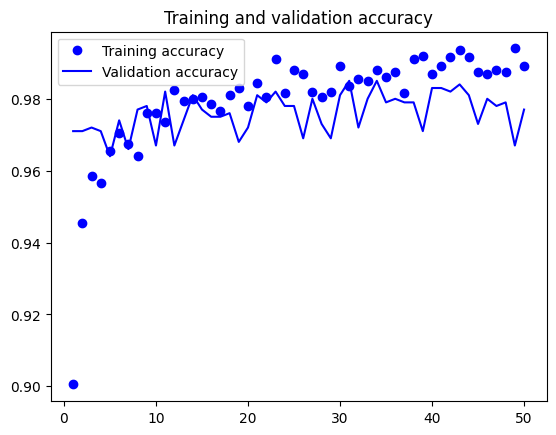

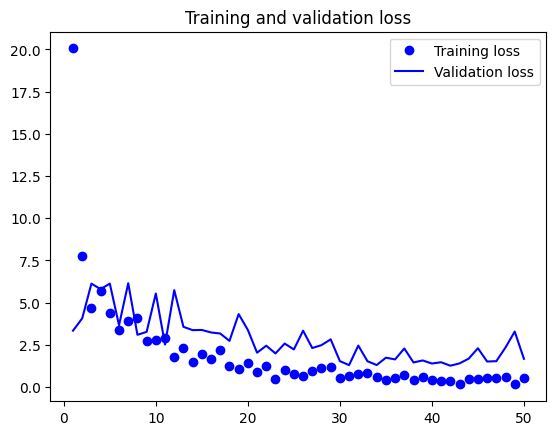

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**테스트 세트에서 모델 평가하기**

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 6s 91ms/step - loss: 1.9748 - accuracy: 0.9785
테스트 정확도: 0.979


### 사전 훈련된 모델 미세 조정하기
1. pre trained model 위에 적절한 layers를 추가합니다.
2. pre trained model의 학습 파라미터를 고정합니다.
3. 추가한 layer를 훈련합니다.
4. pre trained model의 일부 상위 레이어의 trainable을 True로 지정합니다.
5. 이 레이어와 우리가 추가한 부분을 함께 훈련합니다.

![](https://drek4537l1klr.cloudfront.net/chollet2/Figures/08-15.png)

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**마지막에서 네 번째 층까지 모든 층 동결하기**

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**모델 미세 조정하기**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 40s 198ms/step - loss: 0.5490 - accuracy: 0.9860 - val_loss: 1.2930 - val_accuracy: 0.9750
Epoch 2/30
63/63 [==============================] - 11s 164ms/step - loss: 0.3935 - accuracy: 0.9865 - val_loss: 1.3563 - val_accuracy: 0.9770
Epoch 3/30
63/63 [==============================] - 11s 176ms/step - loss: 0.2183 - accuracy: 0.9925 - val_loss: 1.2772 - val_accuracy: 0.9800
Epoch 4/30
63/63 [==============================] - 11s 177ms/step - loss: 0.2375 - accuracy: 0.9935 - val_loss: 1.1578 - val_accuracy: 0.9790
Epoch 5/30
63/63 [==============================] - 11s 176ms/step - loss: 0.3283 - accuracy: 0.9915 - val_loss: 1.5152 - val_accuracy: 0.9750
Epoch 6/30
63/63 [==============================] - 11s 175ms/step - loss: 0.0932 - accuracy: 0.9955 - val_loss: 1.0046 - val_accuracy: 0.9780
Epoch 7/30
63/63 [==============================] - 12s 194ms/step - loss: 0.2570 - accuracy: 0.9905 - val_loss: 1.2605 - val_accuracy: 0.9770

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 7s 101ms/step - loss: 2.1032 - accuracy: 0.9745
테스트 정확도: 0.975


<Axes: >

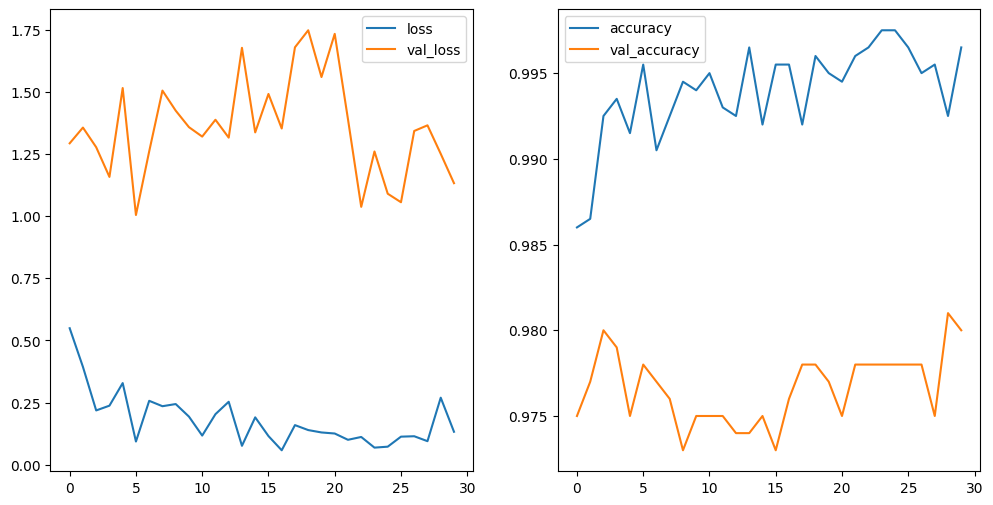

In [ ]:
fted = pd.DataFrame(history.history)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fted[['loss', 'val_loss']].plot(ax=axes[0])
fted[['accuracy', 'val_accuracy']].plot(ax=axes[1])

1/1 [==============================] - 0s 34ms/step
18 번째 이미지가 틀렸네요. 이때 확률값은 8.5656196451333465e-19입니다.


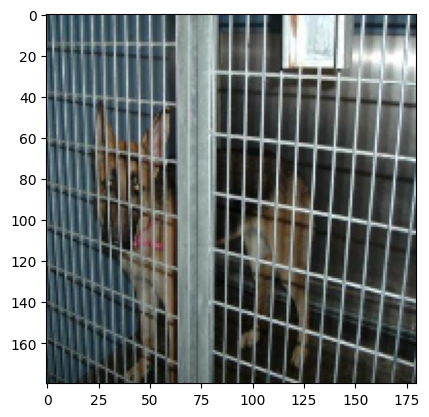

In [ ]:
j = 0
for images, labels in test_dataset:
    preds = model.predict(images).reshape((-1,))
    # print(type(preds), preds.shape)
    yhat = np.where(preds > 0.5, 1, 0)
    # print(type(labels), labels.shape)
    y = labels.numpy().astype('int')
    falseIdx = np.where(y != yhat)[0]
    if len(falseIdx) != 0:
        for i in falseIdx:
            print(f"{j+i} 번째 이미지가 틀렸네요. 이때 확률값은 {preds[i]}입니다.")
            plt.imshow(images[i].numpy().astype('uint8'))
            plt.imshow
        break
    j += 32

## 요약
1. Convnet은 컴퓨터 비전 작업에 가장 적합한 유형의 기계 학습 모델입니다. 아주 작은 데이터 세트에서도 처음부터 훈련하여 괜찮은 결과를 얻을 수 있습니다.
2. Convnet은 모듈식 패턴의 계층 구조와 시각적 세계를 나타내는 개념을 학습하여 작동합니다.
3. 작은 데이터 세트에서는 과적합이 주요 문제가 됩니다. 데이터 증식은 이미지 데이터로 작업할 때 과적합을 방지하는 강력한 방법입니다.
4. 기능 추출을 통해 새 데이터 세트에서 기존 convnet을 쉽게 재사용할 수 있습니다. 이것은 작은 이미지 데이터 세트로 작업하는 데 유용한 기술입니다.
5. 기능 추출을 보완하기 위해 기존 모델에서 이전에 학습한 표현 중 일부를 새로운 문제에 적용하는 미세 조정을 사용할 수 있습니다. 이것은 성능을 조금 더 향상시킵니다.